In [1]:
import torch
from torch.nn import Parameter
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import pandas as pd

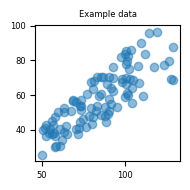

In [26]:
# Data
n = 100
x0 = 50
step = 0.5
slope = 0.5
noisemin = 0.1
moisemax = 0.7
heteroskedasticity_factor = 2
X = torch.Tensor([[x0+i*step+np.random.uniform(noisemin,moisemax)*(i/heteroskedasticity_factor)] for i in range(n)])
y = torch.Tensor([[i*slope+np.random.uniform(noisemin,moisemax*(i/heteroskedasticity_factor))] for i in X])
plt.figure(figsize=(2, 2))  # This creates a 4x4 inch figure
plt.scatter(X, y, alpha=0.5)
fsz=6
plt.title("Example data", fontsize=fsz)
plt.xticks(fontsize=fsz)
plt.yticks(fontsize=fsz)
plt.tight_layout()
plt.show()


In [27]:
# Define a class for a single layer of the neural network
class one_layer(torch.nn.Module):
    def __init__(self, inputSize: int, outputSize: int, act=None, dr=0) -> None:
        super(one_layer, self).__init__()
        self.outputSize = outputSize    # Define the size of the output
        self.w = Parameter(torch.randn(inputSize, outputSize)) # Initialize the weights
        self.b = Parameter(torch.randn(outputSize)) # Initialize the bias
        self.act = act # Activation function
        self.dr = dr # Dropout rate
        self.reset_parameters() # Call the function to reset parameters

    def forward(self, input):
        # Define the forward pass of the layer
        Y = torch.matmul(input,self.w)+self.b
        if self.act is not None:
            Y = self.act(Y) # Apply the activation function if it is not None
        return torch.dropout(Y,p=self.dr,train=self.training) # Apply dropout

    def reset_parameters(self):
        # Reset the parameters of the layer
        std = 1.0 / math.sqrt(self.w.size(0))
        for para in self.parameters():
            para.data.uniform_(-std, std) # Uniformly initialize the parameters


In [28]:
def plot_the_model(X,y,w,b):
    # Convert to numpy for linear regression
    X_np = X.numpy().flatten()
    y_np = y.numpy().flatten()

    # Best fit slope line
    slope, intercept = np.polyfit(X_np, y_np, 1)
    best_fit = slope * X_np + intercept

    model_line = (w * X + b).detach().numpy().flatten()

    # Plotting
    plt.figure(figsize=(5,5))
    plt.scatter(X, y, s=10, label="Data")
    plt.plot(X_np, best_fit, color='red', label=f"Best fit: y={slope:.2f}x + {intercept:.2f}")
    plt.plot(X_np, X_np, color='green', linestyle='--', label="1:1 line")
    plt.plot(X_np, model_line, color='blue', lw=2, linestyle='-.', label=f"model line: y={w.item():.2f}x + {b.item():.2f}")

    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2)  # Adjusted legend position
    plt.tight_layout()  # To ensure the legend doesn't get cut off
    plt.show()
    plt.close()


In [35]:

# Set learning rate and number of iterations for the model training.
learning_rate = 1e-7; niter=10000

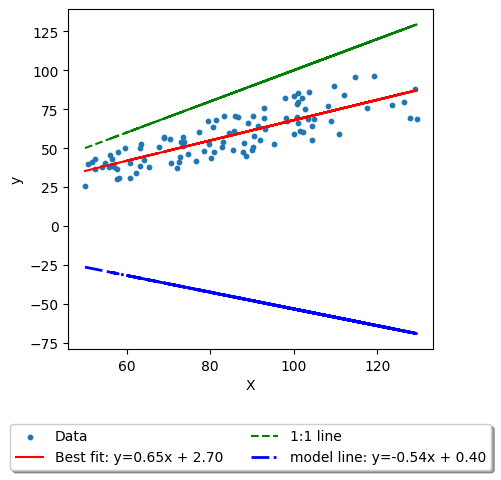

iteration 0, loss is: 11238.306640625, w is: -0.5373237729072571, b is 0.4007549285888672
iteration 50, loss is: 10426.267578125, w is: -0.49226412177085876, b is 0.4012594223022461
iteration 100, loss is: 9673.3349609375, w is: -0.44887539744377136, b is 0.4017452299594879
iteration 150, loss is: 8975.2041015625, w is: -0.40709546208381653, b is 0.40221306681632996
iteration 200, loss is: 8327.8896484375, w is: -0.3668648600578308, b is 0.40266355872154236
iteration 250, loss is: 7727.6904296875, w is: -0.32812604308128357, b is 0.40309739112854004
iteration 300, loss is: 7171.1787109375, w is: -0.29082366824150085, b is 0.40351513028144836
iteration 350, loss is: 6655.17236328125, w is: -0.25490447878837585, b is 0.4039174020290375
iteration 400, loss is: 6176.72607421875, w is: -0.22031724452972412, b is 0.40430477261543274
iteration 450, loss is: 5733.1044921875, w is: -0.18701256811618805, b is 0.4046778082847595
iteration 500, loss is: 5321.77197265625, w is: -0.1549428254365921,

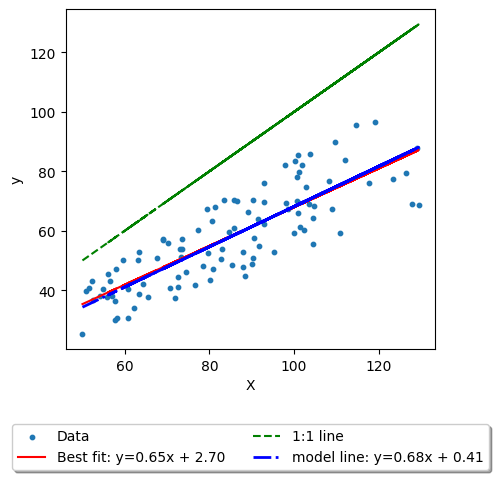

In [36]:
# Setting the dimension of the input and initializing the weights and biases randomly.
d = 1
w = torch.randn(1,d,requires_grad=False)
b = torch.randn(1,requires_grad=False)
plot_the_model(X,y,w,b)
# Iterating over the data for 'niter' number of times.
for t in range(niter):
    # Making predictions by applying linear transformation (matrix multiplication and addition of bias).
    y_pred = torch.matmul(X,w)+b
    # Calculating the difference between the predictions and actual values.
    err = (y_pred - y)
    # Calculating the loss as mean squared error.
    loss = err.pow(2.0).mean()
    # Printing the loss, weights, and bias at every 25th iteration.
    if t % 50 == 0:
      print(f"iteration {t}, loss is: {loss}, w is: {float(w)}, b is {float(b)}")
    # Calculating the gradients for the weights and bias.
    prod = err * X
    w_grad = 1.0*prod.mean()
    b_grad = 1.0*err.mean()
    # Updating the weights and bias using the calculated gradients.
    with torch.no_grad():
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

plot_the_model(X,y,w,b)

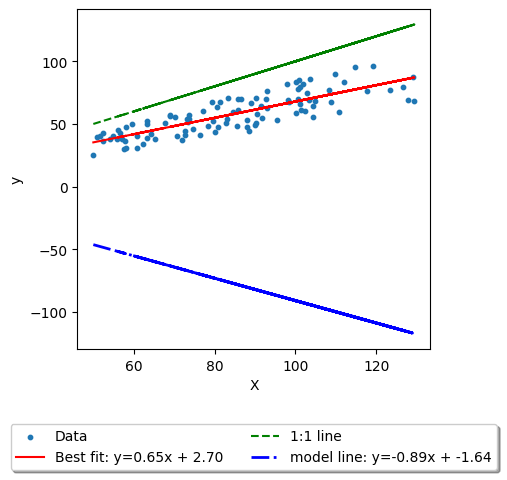

iteration 0, loss is: 19278.982421875, w is: -0.8909489512443542, b is -1.640682578086853
iteration 25, loss is: 17881.23046875, w is: -0.8319098949432373, b is -1.6400209665298462
iteration 50, loss is: 16585.2578125, w is: -0.7750609517097473, b is -1.639384150505066
iteration 75, loss is: 15383.6484375, w is: -0.7203207612037659, b is -1.6387708187103271
iteration 100, loss is: 14269.5341796875, w is: -0.6676112413406372, b is -1.6381802558898926
iteration 125, loss is: 13236.5400390625, w is: -0.6168569326400757, b is -1.6376115083694458
iteration 150, loss is: 12278.7626953125, w is: -0.5679853558540344, b is -1.6370638608932495
iteration 175, loss is: 11390.7236328125, w is: -0.5209265947341919, b is -1.6365364789962769
iteration 200, loss is: 10567.3447265625, w is: -0.47561347484588623, b is -1.6360286474227905
iteration 225, loss is: 9803.9189453125, w is: -0.4319812059402466, b is -1.6355395317077637
iteration 250, loss is: 9096.08203125, w is: -0.38996750116348267, b is -1.6

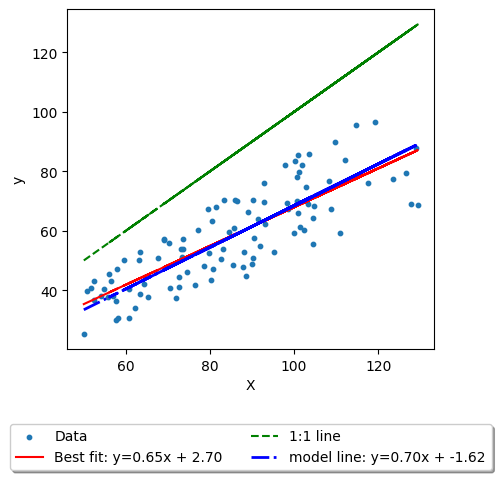

In [37]:
d = 1 # only one regressor.
w = torch.randn(1,d,requires_grad=True)
b = torch.randn(1,requires_grad=True)
optim = torch.optim.SGD([w,b],lr=learning_rate)
plot_the_model(X,y,w,b)
for t in range(niter):
    y_pred = torch.matmul(X,w)+b # first dimension in xT is minibatch
    # the statement above can be generalized to y = model(x)
    err = (y_pred - y)
    loss = err.pow(2.0).mean() # mean squared error
    loss.backward() # run backpropagation

    optim.step() # update the parameters, just like w -= learning_rate * w.grad
    optim.zero_grad()
    if t % 25 == 0:
     print(f"iteration {t}, loss is: {loss}, w is: {float(w)}, b is {float(b)}")
plot_the_model(X,y,w,b)

In [38]:
b, w

(tensor([-1.6226], requires_grad=True), tensor([[0.7006]], requires_grad=True))